<a href="https://colab.research.google.com/github/fadodo/ML_Bank_customer_Churn/blob/main/ML_Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting customer churn in a bank thank to Machine Learning


We will work on the dataset available on Kaggle [here](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction).

## Data loading

In [67]:
### Connect to my drive
from google.colab import drive

#auth.authenticate_user()
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
## load data
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

## Data exploration

### Checking the dataset lines, columns, type and format

In [69]:
# get a global insight of the data
df.info()
#
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Checking Null and missing values

<Axes: >

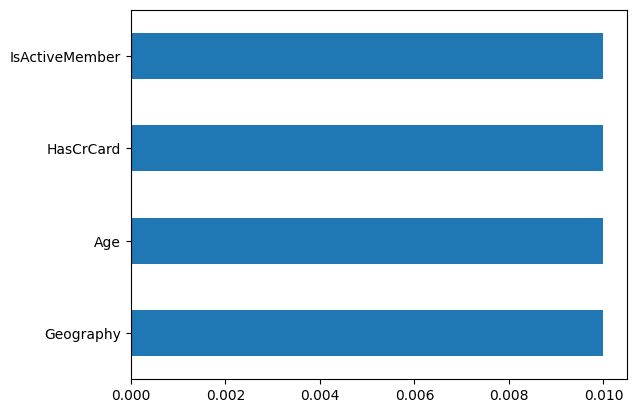

In [70]:
# Check null and missing values
df.isnull().sum()

# number of columns having an NaN values
ncoln=(df.isnull().sum()>0).sum()

# Percentage of null or missiong values
(df.isnull().sum()*100/(len(df))).sort_values(ascending=False).head(ncoln).plot(kind='barh')

### Cleaning the data set to remove all the null entries

In [71]:
df_clean= df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9998 non-null   int64  
 1   CustomerId       9998 non-null   int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9998 non-null   int64  
 4   Geography        9998 non-null   object 
 5   Gender           9998 non-null   object 
 6   Age              9998 non-null   float64
 7   Tenure           9998 non-null   int64  
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9998 non-null   int64  
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9998 non-null   float64
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9998 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# Proceeding to an supervised classification task

The goal is to predict bank customer churn with customers valuable variables such as :
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no)

## Definition of the Feature and Target data

In [72]:
# Features (independent variables) 2D array

X = df_clean.drop(columns=['RowNumber','CustomerId', 'Surname', 'Exited'])

# Target (dependent variable) 1D array

y = df_clean['Exited']


## Spliting the dataset in 3 subsets. 60 % for training, 20 % for est and 20% for evaluation



In [73]:

# import of the model_selection module

from sklearn.model_selection import train_test_split, cross_val_score

# First split the dataset in 2 subsets X_train and X_test

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, train_size=0.6)

In [74]:
# Second , Split the X_test subset in 2 Susets  X_test and X_eval

X_test, X_eval, y_test, y_eval=train_test_split(X_test, y_test, random_state=42, test_size=0.5)

## Data structuration

In [75]:
# load all the necessaries package
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

## Selection of the the numerical and non_numerical columns from features with make_column_selector
## Standard Scaling of numeric features
## OneHotEncoder of non numerical features
## Concatenation of the numerical and non_numerical features with make_column_transformer
## Instantiation of the Model with make_pipeline


col_t=make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OrdinalEncoder(), make_column_selector(dtype_exclude=np.number))
    )

modell=make_pipeline(col_t, LogisticRegression())

### Cross-validation score Model

In [76]:
# Cross validation of the model with five subsets
scores=cross_val_score(estimator=modell, X=X_train, y=y_train, cv=5)

print(scores)
print(f' The cross-validation score is : {scores.mean().round(2)}')

[0.805      0.81333333 0.8125     0.80650542 0.81734779]
 The cross-validation score is : 0.81


### Fitting the Model

In [77]:
## Fitting of the model
modell.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c5d1cad85d0>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c5d1cada310>)])),
                ('logisticregression', LogisticRegression())])

### Scoring the model

In [78]:
## Scoring of the model
score = modell.score(X_test, y_test)
print(f' The model score is : {round(score,2)}')

 The model score is : 0.81


## Features importance

In [79]:
from sklearn.inspection import permutation_importance
## Features permutations allows to check which features causes the most changes in the target
perm=permutation_importance(modell, X_test, y_test, n_repeats=10, random_state=42)

In [80]:
## saving the result into a dataframe
f_importance=pd.DataFrame({
    'features':X_test.columns,
    'importance':perm.importances_mean
    })

<Axes: title={'center': 'Features importance'}, ylabel='features'>

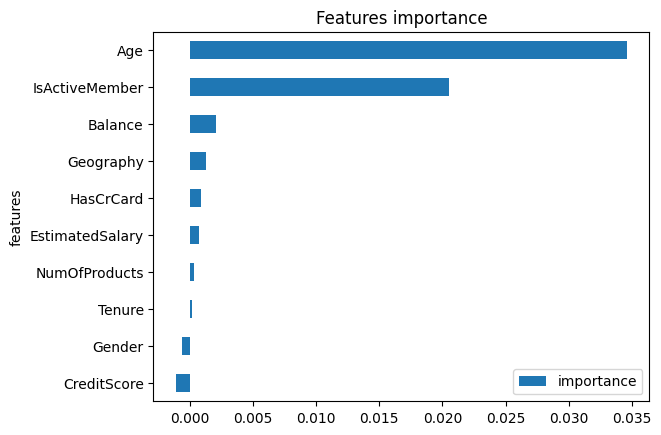

In [81]:
## Plotting the importance scale of feature
f_importance.sort_values(by=['importance']).plot.barh(x='features', y='importance', title='Features importance')

## Evaluating the model

In [82]:
# Prediction with the model
y_pred=modell.predict(X_eval)

### Confusion Matrix


In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique classes from y_eval
# This assumes y_eval contains the true labels for your evaluation data
classes = y_eval.unique()

# Create confusion matrix with the unique classes
cm = confusion_matrix(y_eval, y_pred, labels=classes)

print(cm)

[[1539   42]
 [ 338   81]]


### Dislay the matrix confusion

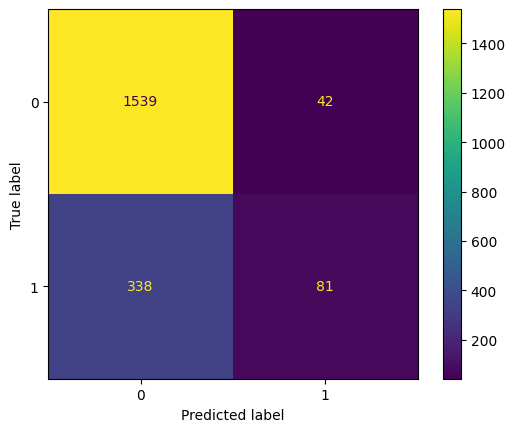

In [84]:
## Display of the Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

### Display the Classification report

In [85]:
## Print the classification report

print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1581
           1       0.66      0.19      0.30       419

    accuracy                           0.81      2000
   macro avg       0.74      0.58      0.59      2000
weighted avg       0.79      0.81      0.77      2000



# Interpretation

Exited: Whether the customer has churned (1 = yes, 0 = no)

- The model shows an accuracy of 81% which is a good performance of the model

- The **precision** shows that out of all the customer that the model predicted would churned, only 66% actually did.

- The **recall** shows that out of all the customers that actually did churned, the model only predicted this outcome correctly for 19% of those customers.

- The **f1-score** shows that the model does a good job of predicting the unchurned customers.

- The **support** : we have 1581 of class 0 and 419 of class 1, which is a really unbalanced dataset.

# ***Overall, this classifier or model is better to find class 0 over class 1. That is not in accordance of our goal to better predict a bank customer churn.***





